# Assignment 1 - Group 9

Members: Jonas Röst, Kailash De Jesus Hornig

In [1]:
!pip install graphviz==0.20.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 7.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import graphviz

%config InlineBackend.figure_format = 'svg' 
plt.style.use('seaborn')
%matplotlib inline  

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import Perceptron, LogisticRegression, Lasso
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier, MLPRegressor


/tmp/ipykernel_74/205597606.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Task 1 -  A classification example: fetal heart condition diagnosis

## Step 1

In [3]:
  # Read the CSV file.
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

## Step 2

In [4]:
def cross_validation_calculator(cross_val_array):
    return np.mean(cross_val_array)

In [5]:
#Try dummy classifier
clf = DummyClassifier(strategy='most_frequent')

cross_val = cross_val_score(clf, Xtrain, Ytrain)
cross_validation_calculator(cross_val)

0.7805882352941176

## Step 3

In [6]:
#Trying tree-based classifiers

DTC = DecisionTreeClassifier(criterion = "gini", splitter="best", min_samples_split = 60)
RFC = RandomForestClassifier(criterion = "gini", min_samples_split = 20)
GBC = GradientBoostingClassifier(loss = "deviance", min_samples_split = 40) 

print("DecisionTreeClassifier: "+str(cross_validation_calculator(cross_val_score(DTC, Xtrain, Ytrain))))
print("RandomForestClassifier: "+str(cross_validation_calculator(cross_val_score(RFC, Xtrain, Ytrain))))
print("GradientBoostingClassifier: "+str(cross_validation_calculator(cross_val_score(GBC, Xtrain, Ytrain))))


DecisionTreeClassifier: 0.9311764705882352
RandomForestClassifier: 0.9382352941176471
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss par

In [7]:
#Trying linear classifiers

PC = Perceptron(penalty = "elasticnet", shuffle = True, early_stopping = True)
LRC = LogisticRegression(solver = "newton-cg", multi_class="multinomial")
SVC = LinearSVC(loss = "squared_hinge", max_iter = 10000, dual = False)

print("Perceptron: "+str(cross_validation_calculator(cross_val_score(PC, Xtrain, Ytrain))))
print("LogisticRegression: "+str(cross_validation_calculator(cross_val_score(LRC, Xtrain, Ytrain))))
print("LinearSVC: "+str(cross_validation_calculator(cross_val_score(SVC, Xtrain, Ytrain))))

Perceptron: 0.8382352941176471
LogisticRegression: 0.8905882352941177
LinearSVC: 0.8958823529411765


In [8]:
# Trying neural network classifier
MLP = MLPClassifier(hidden_layer_sizes = (100, 80, 50), activation="relu")

print("MLPCladdifier: "+str(cross_validation_calculator(cross_val_score(MLP, Xtrain, Ytrain))))

MLPCladdifier: 0.8876470588235295


## Step 4

In [9]:
# GradientBoostClassifier had the highest cross validation score
GBC.fit(Xtrain, Ytrain)
Yguess = GBC.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
0.931924882629108


The classifier that we selected was GradientBoostClassifier with a "deviance" loss function and min_samples_split = 40, as this classifier got the highest cross validation score of 0.95. The accuracy_score attained when evaluated on the test data was 0.93. 

GradientBoostinClassifier is, as the name suggest‚ a algorithm that based on an additive model that builds stage-wise by in each step considering a variable to add to or subtractract from a set of exploratory variables. This can be done based on a criterion specified by the user, normally this is forward, backward or in a conbined sequence of F-tests or t-tests. The algortihm allows for optimization of arbitrary differentiable loss functions. The n_class number of regression trees are fit based on the negative gradient of the loss function with for example binary or multiclass log loss in each stage.(A special case is the binary classification where only a sinle gression tree is induced).    

Sources: 
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
-  https://en.wikipedia.org/wiki/Stepwise_regression 


# Task 2 - Decision trees for classification


In [10]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [11]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [12]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)  
        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):
        

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)
        

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
       
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [13]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [14]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [15]:
TC = TreeClassifier(max_depth=7, criterion = "gini")

#Evaluate cross validation to determine max_depth
print("Cross validation TreeClassifier: "+str(cross_validation_calculator(cross_val_score(TC, Xtrain, Ytrain))))

TC.fit(Xtrain, Ytrain)
YguessTC = TC.predict(Xtest)
print(accuracy_score(Ytest, YguessTC))

Cross validation TreeClassifier: 0.934705882352941
0.9131455399061033


We selected a max_depth = 7 as this resulted in the highest cross validation score when using Gini as criterion. This resulted in an accuracy score of 0.91. 
Below a TreeClassifier with max_depth = 3 can be seen as illustration of the classifier.

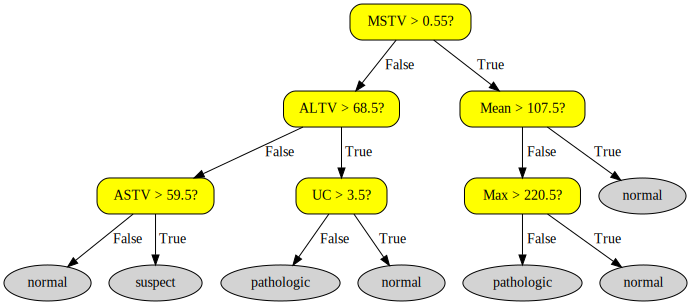

In [16]:
draw_TC = TreeClassifier(max_depth=3, criterion = "gini")
draw_TC.fit(Xtrain, Ytrain)
draw_TC.draw_tree()

# Task 3 - A regression example: predicting apartment prices

In [17]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
def regression_cross_val_calc(stats_dict):
    arr = stats_dict.get("test_score")
    return cross_validation_calculator(arr)

In [19]:
# Creating a baseline with dummy 
m1 = DummyRegressor()
print("DummyRegressor: "+str(regression_cross_val_calc(cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))

DummyRegressor: -0.38925247260237555


In [20]:
# Trying a selection of regression models
LassoC = Lasso()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
MLPR = MLPRegressor(hidden_layer_sizes = (100, 80, 50), activation="relu")

print("Lasso: "+str(regression_cross_val_calc(cross_validate(LassoC, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))
print("DecisionTreeRegressor: "+str(regression_cross_val_calc(cross_validate(DTR, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))
print("GradientBoostingRegressor: "+str(regression_cross_val_calc(cross_validate(GBR, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))                             
print("MLPRegressor: "+str(regression_cross_val_calc(cross_validate(MLPR, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))                                                                 

Lasso: -0.30104706717488716
DecisionTreeRegressor: -0.528835006688973
GradientBoostingRegressor: -0.26454837169769174
MLPRegressor: -18813.902498848067


In [21]:
#Tuned models' perfomance

LassoC = Lasso(alpha = 0.1)
# best/smallest obtained error is with a=0.1

DTR = DecisionTreeRegressor(min_samples_split=350)
# max depth: little to no effect
# number of nodes in tree: min_samples_split ≈ 350 seem to yeild best result
# tree pruning is not avaibale for scikit

GBR = GradientBoostingRegressor(loss='squared_error',n_estimators=200)
# Loss: best results with'squared_error'
# n_estimators(The number of trees in the forest): good enough after 200+
# max_depth: around 5 seems to be sweet spot
# min_samples_split: no big effect
# tree pruning is not avaibale for scikit

print("Lasso: "+str(regression_cross_val_calc(cross_validate(LassoC, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))
print("DecisionTreeRegressor: "+str(regression_cross_val_calc(cross_validate(DTR, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))
print("GradientBoostingRegressor: "+str(regression_cross_val_calc(cross_validate(GBR, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))                             


Lasso: -0.2981786493131544
DecisionTreeRegressor: -0.28399131187511834
GradientBoostingRegressor: -0.25820564692424286


In [22]:
#Best performance with DecisionTreeRegressor
GBR = GradientBoostingRegressor(loss='squared_error',n_estimators=200)
GBR.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, GBR.predict(Xtest))

0.26489642134345626

Comments on the tuning. From the initial values before selected models, all but the MLPRegressor were well below the baseline value. After tuning the hyperparameter the best scoring model was -0.25 which was obtained with GradientBoostingRegressor. The MLPRegressor was not tuned as the results were so poor from the beginning.  Replacing the dummy with the best-performing configuration of GradientBoostingRegressor the final evaluation got a prediction error of 0.26. 

# Task 4 - Decision trees for regression

## Step  1

In [23]:
from collections import Counter
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, criterion='variance_reduction'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def variance_reduction(full_var, n_full, high_var, n_high, low_var, n_low):
        return full_var - n_high/n_full*high_var - n_low/n_full*low_var
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        super().fit(X, Y)
        #self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean of the values.
    def get_default_value(self, Y):
        self.mean = np.mean(Y)
        return self.mean
    
    # Checks whether a set of output values is homogeneous.
    # If the variance is less than our threshhold, this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        if np.var(Y) < 0.1: #Hard coded
            return True
        else:
            return False
       
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)
        full_var = 1/n*sum(i*i for i in Y) - 1/n**2*sum(Y)**2
        
        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = list([])
        high_distr = list(Y_sorted)
        
        # Initiate vaiables used in for loop
        sum_low = 0
        sum_low_squared = 0
        sum_high = sum(high_distr)
        sum_high_squared = sum(k**2 for k in high_distr)
        
        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Increment sums
            sum_low += y_i
            sum_low_squared += y_i**2
            sum_high -= y_i
            sum_high_squared -= y_i**2
            
            
            # Update the frequency tables.
            low_distr.append(y_i)
            del high_distr[0] #Remove current y value from high
            

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue
                
            # Update the variables for variance reduction    
            n_low = len(low_distr)
            n_high = len(high_distr)
            low_var = 1/n_low*sum_low_squared - 1/n_low**2*sum_low**2
            high_var = 1/n_high*sum_high_squared - 1/n_high**2*sum_high**2

            # Compute the homogeneity criterion for a split at this position.
            #score = variance_reduction(full_var, n, high_var, n_high, low_var, n_low)
            score = full_var - n_high/n*high_var - n_low/n*low_var

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


## Step 2

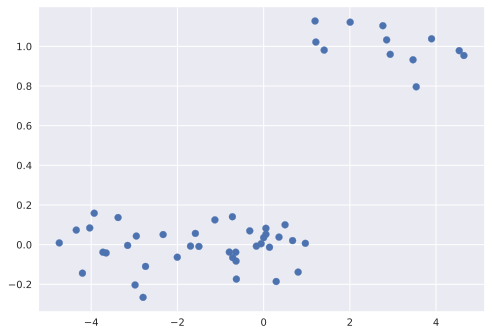

In [24]:
#Generate data
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

# reseed random state singleton, create data points(x,y) and plot
np.random.seed(2)
x, y = make_some_data(50)
plt.scatter(x,y)

Using the above generated data as example.

We would want a decision tree regressor that outputs the mean of the data points with x < 1 when x < 1 and outputs the mean of the data with x > 1 when x > 1. It would look like a piecewise linear function if plotted. 

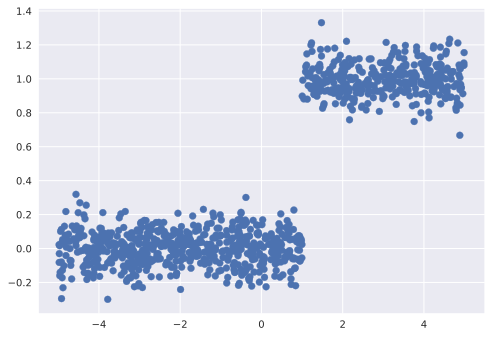

In [25]:
xtrain, ytrain = make_some_data(1000)
plt.scatter(xtrain,ytrain)

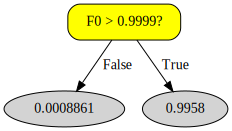

In [26]:
# Tre
TR = TreeRegressor(max_depth = 2)
TR.fit(xtrain, ytrain)
TR.draw_tree()

## Step 3

In [27]:
app_tree_regressor = TreeRegressor(max_depth = 6)
print("Cross validation score: "+
       str(regression_cross_val_calc(cross_validate(app_tree_regressor, Xtrain, Ytrain, scoring='neg_mean_squared_error'))))

app_tree_regressor.fit(Xtrain, Ytrain)
Yguess = app_tree_regressor.predict(Xtest)
print(mean_squared_error(Ytest, Yguess))


Cross validation score: -0.28074150417402327
0.2864363437254071


We choose to have max_depth = 6 as this resulted in the lowest cross-validation score. We ran the tree regressor on the test data and got an evaluation score of 0.2865

## Step 4

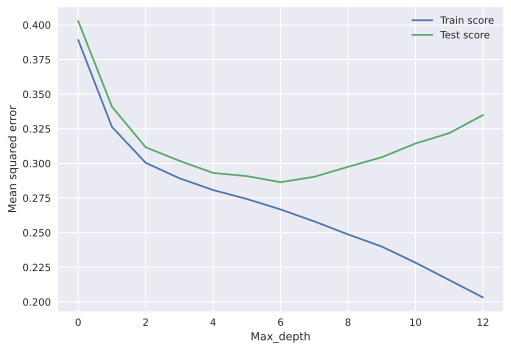

In [28]:
depths = list(range(13))
train_score = []
test_score = []

# Calculate scores for each max_depth
for d in depths:
    model = TreeRegressor(max_depth = d)
    model.fit(Xtrain, Ytrain)
    train_score.append(mean_squared_error(Ytrain, model.predict(Xtrain)))
    test_score.append(mean_squared_error(Ytest, model.predict(Xtest)))

#Plot the scores
plt.plot(depths, train_score, label = "Train score")
plt.plot(depths, test_score, label = "Test score")
plt.xlabel("Max_depth")
plt.ylabel("Mean squared error")
plt.legend()

From the training score curve, the mean squared error continues to drop within the interval 0 to 12, although with varying dropping speeds. This while the test score also curve drops initially but has a round shape with an optimal lowest score at depth = 6, ie. higher errors for lower and higher values of max depth than 6. The reason for this is that deeper decision trees better determine each individual data point, but at the cost of overfitting and not being able to generalize to data points not included in the training set.  Before the max depth of 6 the decision tree gets better in determining the data points correctly with each deeper level, but then again fails to generalize after a certain point as the training set does not include all possible outcomes and needs a certain flexibility.     

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=727b6f02-a414-4cc8-9dec-71ed60bb1da5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>